In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,TimeSeriesSplit,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

<h2>Dependent variables</h2>

We are trying to predict 1/3/5/7/10/15/20/25/30-day return on each single stock.

In [22]:
PVH = pd.read_csv('PVH+TI.csv',index_col=0)
NKE = pd.read_csv('NKE+TI.csv',index_col=0) 
GPC = pd.read_csv('GPC+TI.csv',index_col=0)
TSCO = pd.read_csv('TSCO+TI.csv',index_col=0)
WMT = pd.read_csv('WMT+TI.csv',index_col=0)
SHW = pd.read_csv('SHW+TI.csv',index_col=0)
HLT = pd.read_csv('HLT+TI.csv',index_col=0)
MAR = pd.read_csv('MAR+TI.csv',index_col=0)
CCL = pd.read_csv('CCL+TI.csv',index_col=0)
NCLH = pd.read_csv('NCLH+TI.csv',index_col=0)
RCL = pd.read_csv('RCL+TI.csv',index_col=0)
V = pd.read_csv('V+TI.csv',index_col=0)
MA = pd.read_csv('MA+TI.csv',index_col=0)
CPRI = pd.read_csv('CPRI+TI.csv',index_col=0)

In [23]:
# absolute return/classification 1/0

stocks = [PVH,NKE,GPC,TSCO,WMT,SHW,HLT,MAR,CCL,NCLH,RCL,V,MA,CPRI]
lags = [1,3,5,7,10,15,20,25,30]

def calculate_return(stocks,lags):
    outcomes = []
    for stock in stocks:
        close_price = stock['Close']
        df = pd.DataFrame(index=close_price.index)
        for lag in lags:
            abs_returns = close_price.pct_change(lag)
            signals = [np.where(i>=0,1,0) if not np.isnan(i) else np.NaN for i in abs_returns]
            df[f"Abs_return{lag}"] = abs_returns
            df[f"Signals{lag}"] = signals
        outcomes.append(df)
    return outcomes

outcomes = calculate_return(stocks,lags)

In [24]:
PVH_outcome = outcomes[0]
NKE_outcome = outcomes[1]
GPC_outcome = outcomes[2]
TSCO_outcome = outcomes[3]
WMT_outcome = outcomes[4]
SHW_outcome = outcomes[5]
HLT_outcome = outcomes[6]
MAR_outcome = outcomes[7]
CCL_outcome = outcomes[8]
NCLH_outcome = outcomes[9]
RCL_outcome = outcomes[10]
V_outcome = outcomes[11]
MA_outcome = outcomes[12]
CPRI_outcome = outcomes[13]

In [25]:
stock_outcomes = [PVH_outcome,NKE_outcome,GPC_outcome,TSCO_outcome,
                  WMT_outcome,SHW_outcome,HLT_outcome,MAR_outcome,
                  CCL_outcome,NCLH_outcome,RCL_outcome,V_outcome,
                  MA_outcome,CPRI_outcome]

In [26]:
CPRI_outcome

,Abs_return1,Signals1,Abs_return3,Signals3,Abs_return5,Signals5,Abs_return7,Signals7,Abs_return10,Signals10,Abs_return15,Signals15,Abs_return20,Signals20,Abs_return25,Signals25,Abs_return30,Signals30
Dates,,,,,,,,,,,,,,,,,,
2011-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-16,-0.004132,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-19,0.032365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-20,0.022910,1,0.051653,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-21,0.043222,1,0.101660,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,-0.007100,0,0.076377,1,0.092220,1,0.170261,1,0.121530,1,0.155753,1,0.227964,1,0.261186,1,0.096502,1
2019-11-12,0.005226,1,0.025821,1,0.072162,1,0.131579,1,0.153361,1,0.148649,1,0.214286,1,0.309097,1,0.162532,1
2019-11-13,-0.016963,0,-0.018842,0,0.063647,1,0.079303,1,0.135229,1,0.135947,1,0.163160,1,0.291053,1,0.213441,1


In [27]:
PVH_outcome.to_csv("PVH_outcome.csv")
NKE_outcome.to_csv("NKE_outcome.csv")
GPC_outcome.to_csv("GPC_outcome.csv") 
TSCO_outcome.to_csv("TSCO_outcome.csv") 
WMT_outcome.to_csv("WMT_outcome.csv")
SHW_outcome.to_csv("SHW_outcome.csv") 
HLT_outcome.to_csv("HLT_outcome.csv") 
MAR_outcome.to_csv("MAR_outcome.csv") 
CCL_outcome.to_csv("CCL_outcome.csv") 
NCLH_outcome.to_csv("NCLH_outcome.csv") 
RCL_outcome.to_csv("RCL_outcome.csv") 
V_outcome.to_csv("V_outcome.csv")
MA_outcome.to_csv("MA_outcome.csv")
CPRI_outcome.to_csv('CPRI_outcome.csv')

<h2>Technical Features</h2>

In [28]:
PVH

,Open,High,Low,Close,Volume,"MACD(12, 26, 9)","MACDSignal(12, 26, 9)","MACD(24, 52, 9)","MACDSignal(24, 52, 9)","MACD(5, 42, 5)",...,DPO20,DPO28,PSY5,PSY10,PSY14,PSY20,PSY28,"SAR(0.02, 0.2)","SAR(0.02, 0.1)","SAR(0.01, 0.2)"
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-03,8.1875,8.1875,7.7500,7.8125,30100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,7.7500,7.8750,7.4375,7.5000,17500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.187500,8.187500,8.187500
2000-01-05,7.5000,7.5625,7.3750,7.3750,26800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.172500,8.172500,8.180000
2000-01-06,7.3750,7.6875,7.2500,7.5625,48400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.140600,8.140600,8.163900
2000-01-07,7.5625,7.8750,7.3750,7.3750,20900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.087164,8.087164,8.136483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,97.2100,97.7550,96.2000,96.7200,602107,2.674743,2.007215,2.480504,1.811731,6.768393,...,1.5365,0.108571,60.0,50.0,42.857143,55.0,57.142857,88.000700,88.000700,88.197939
2019-11-12,97.1000,97.9600,96.0810,96.8800,591626,2.749901,2.155753,2.632171,1.975819,6.746658,...,-2.0295,2.683929,60.0,60.0,50.000000,55.0,57.142857,88.775858,88.775858,89.088484
2019-11-13,96.1600,96.9450,95.4700,96.7300,609819,2.765482,2.277699,2.752153,2.131086,6.585220,...,-3.7335,1.606429,60.0,60.0,50.000000,50.0,53.571429,89.504506,89.504506,89.916690


In [29]:
PVH.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD(12, 26, 9)',
       'MACDSignal(12, 26, 9)', 'MACD(24, 52, 9)', 'MACDSignal(24, 52, 9)',
       'MACD(5, 42, 5)',
       ...
       'DPO20', 'DPO28', 'PSY5', 'PSY10', 'PSY14', 'PSY20', 'PSY28',
       'SAR(0.02, 0.2)', 'SAR(0.02, 0.1)', 'SAR(0.01, 0.2)'],
      dtype='object', length=127)

<h2>Macro Features</h2>

In [30]:
macro = pd.read_csv("macro_data.csv",index_col=0)
macro.index = pd.to_datetime(macro.index)
macro

,SYMBOL,PX_LAST
Dates,,
2000-01-31,BBG002SPKTM9,1.2000
2000-02-29,BBG002SPKTM9,-0.1000
2000-03-31,BBG002SPKTM9,0.8000
2000-04-30,BBG002SPKTM9,0.7000
2000-05-31,BBG002SPKTM9,0.4000
...,...,...
2019-11-11,BBG0013HFN45,0.9934
2019-11-12,BBG0013HFN45,0.9931
2019-11-13,BBG0013HFN45,0.9901


In [31]:
macro_dict={}
symbols = macro['SYMBOL'].unique()

for symbol in symbols:
    macro_dict[symbol] = macro[macro['SYMBOL']==symbol].drop(columns=["SYMBOL"]).rename(columns={"PX_LAST":symbol})

In [32]:
# combine all macro features in a dataframe
keys = list(macro_dict.keys())

for i in range(len(keys)):
    if i == 0:
        macro_features = macro_dict[keys[0]]
    else:
        macro_features = macro_features.join(macro_dict[keys[i]],how='outer')# use outer join to keep every data

In [33]:
# calculate correlation between macro_features and returns
macro_features

,BBG002SPKTM9,BBG002STD0M2,BBG002SSL321,BBG008S63QC4,BBG002SBDC81,BBG002S5SQJ5,BBG002TQ9CL7,BBG002SNY0Q8,BBG002SBLNP9,BBG002SCTB48,...,BBG002SQBMB4,BBG002SWWSS7,BBG002SWWT05,BBG002SQBMC3,BBG002SG9PT3,BBG002SWWSY0,BBG0013HGRV5,BBG0013HG3T1,BBG0013HFH84,BBG0013HFN45
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-9.400,40.700,NaN,29.300,30.750,1.0243,101.45,1.6362,1.5670
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.150,1.300,NaN,13.850,-11.200,1.0296,103.22,1.6360,1.5573
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-5.750,35.250,NaN,29.550,23.350,1.0321,104.14,1.6426,1.5486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6342,-13.244,-22.280,1.7271,26.134,-28.978,1.1033,109.05,1.2855,0.9934
2019-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6006,-12.246,-21.257,1.7038,27.040,-28.833,1.1009,109.01,1.2845,0.9931
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5773,-14.757,-23.631,1.6760,24.391,-28.700,1.1007,108.82,1.2851,0.9901


In [34]:
PVH_outcome

,Abs_return1,Signals1,Abs_return3,Signals3,Abs_return5,Signals5,Abs_return7,Signals7,Abs_return10,Signals10,Abs_return15,Signals15,Abs_return20,Signals20,Abs_return25,Signals25,Abs_return30,Signals30
Dates,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.040000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,-0.016667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.025424,1,-0.032000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,-0.024793,0,-0.016667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,-0.012658,0,0.037768,1,0.035768,1,0.109683,1,0.078622,1,0.082485,1,0.112491,1,0.155418,1,0.096226,1
2019-11-12,0.001654,1,-0.007987,0,0.020326,1,0.075369,1,0.095680,1,0.048598,1,0.106441,1,0.198862,1,0.130983,1
2019-11-13,-0.001548,0,-0.012556,0,0.037876,1,0.035875,1,0.094478,1,0.054278,1,0.103594,1,0.168801,1,0.166828,1


<h3> Data preparation before feature selection

In [35]:
# To avoid look-ahead bias, we choose forward filling method to handle NaN in macro indexes
macro_features = macro_features.fillna(method='ffill')

In [36]:
macro_features

,BBG002SPKTM9,BBG002STD0M2,BBG002SSL321,BBG008S63QC4,BBG002SBDC81,BBG002S5SQJ5,BBG002TQ9CL7,BBG002SNY0Q8,BBG002SBLNP9,BBG002SCTB48,...,BBG002SQBMB4,BBG002SWWSS7,BBG002SWWT05,BBG002SQBMC3,BBG002SG9PT3,BBG002SWWSY0,BBG0013HGRV5,BBG0013HG3T1,BBG0013HFH84,BBG0013HFN45
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-9.400,40.700,NaN,29.300,30.750,1.0243,101.45,1.6362,1.5670
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.150,1.300,NaN,13.850,-11.200,1.0296,103.22,1.6360,1.5573
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-5.750,35.250,NaN,29.550,23.350,1.0321,104.14,1.6426,1.5486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,0.2,-33.5,0.0,274.21,212.43,2.8,0.3,7361.0,1461.0,55814.39,...,1.6342,-13.244,-22.280,1.7271,26.134,-28.978,1.1033,109.05,1.2855,0.9934
2019-11-12,0.2,-33.5,0.0,274.21,212.43,2.8,0.3,7361.0,1461.0,55814.39,...,1.6006,-12.246,-21.257,1.7038,27.040,-28.833,1.1009,109.01,1.2845,0.9931
2019-11-13,0.2,-33.5,0.0,274.21,212.43,2.8,0.3,7361.0,1461.0,55814.39,...,1.5773,-14.757,-23.631,1.6760,24.391,-28.700,1.1007,108.82,1.2851,0.9901


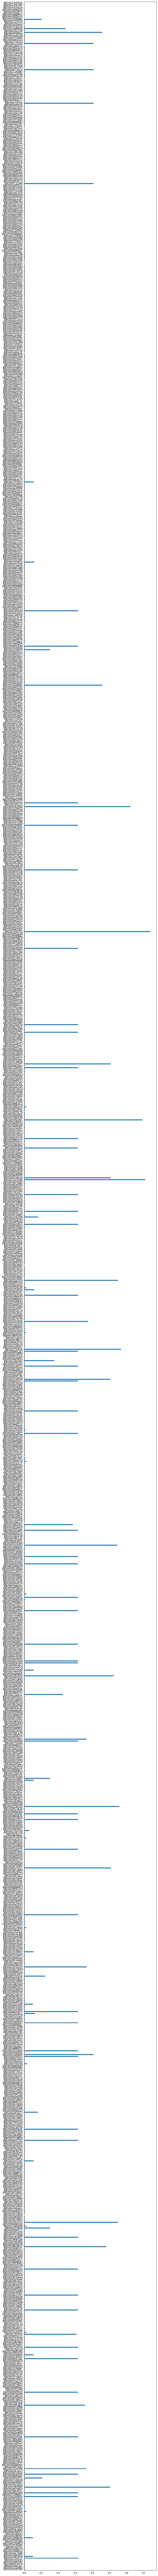

In [37]:
# check how many missing values are there after forward filling
%matplotlib inline
macro_features.isnull().sum().div(len(macro_features)).plot(kind='barh',figsize=(10,200))


In [38]:
missing_pct = macro_features.isnull().sum().div(len(macro_features)).sort_values(ascending=False)

In [39]:
# drop the macro indexes which have more than 10% missing values
dropped_index = missing_pct[missing_pct>=0.1].index
macro_features = macro_features.drop(columns=dropped_index)

In [40]:
macro_features.to_csv("All_macro_features.csv")